### In this notebook, we show a classification and regression example using the employee dataset. In the classification model, the target variable is "doubling_salary" that shows if an employee would have a double or more salary. This binary target variable is equal to one when salary is doubled and zero otherwise. The target variable in the regression example is "salary_growth" that represents the amount of increase in an employee's salary.

### The explanatory variables include age, edu, jobtime, prevexp, minority and gender. Definition of these explanatory variables is presented below. 

In [19]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from safeaipackage import safeai


warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 10000)

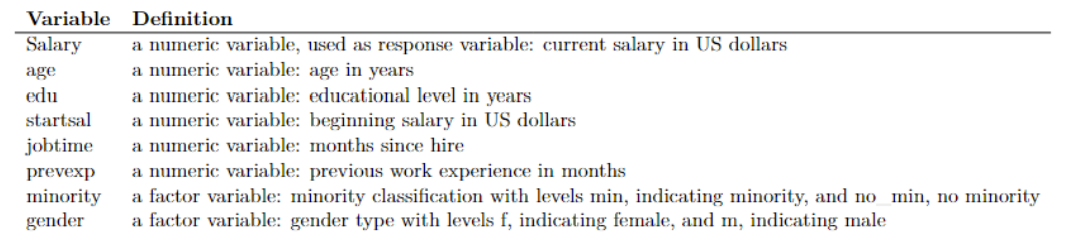

In [8]:
data = pd.read_excel("employee.xlsx")
print("This dataset has {} rows and {} columns".format(data.shape[0], data.shape[1]))
data.head()

This dataset has 473 rows and 8 columns


,salary,age,edu,startsal,jobtime,prevexp,minority,gender
0,57000,36,15,27000,98,144,no_min,m
1,40200,30,16,18750,98,36,no_min,m
2,21450,59,12,12000,98,381,no_min,f
3,21900,41,8,13200,98,190,no_min,f
4,45000,33,15,21000,98,138,no_min,m


In [14]:
data["gender"] = np.where(data["gender"]=="m", 0, 1)
data["minority"] = np.where(data["minority"]=="no_min", 0, 1)
data.head()

,salary,age,edu,startsal,jobtime,prevexp,minority,gender,doubling_salary
0,57000,36,15,27000,98,144,1,1,1
1,40200,30,16,18750,98,36,1,1,1
2,21450,59,12,12000,98,381,1,1,0
3,21900,41,8,13200,98,190,1,1,0
4,45000,33,15,21000,98,138,1,1,1


In [15]:
data["doubling_salary"] = np.where(data["salary"]/data["startsal"] > 2,1,0)

data["doubling_salary"].value_counts()

doubling_salary
0    253
1    220
Name: count, dtype: int64

In [16]:
data["salary_growth"] = data["salary"]-data["startsal"]

data.drop(["salary", "startsal"], axis=1, inplace=True)
data.head()

,age,edu,jobtime,prevexp,minority,gender,doubling_salary,salary_growth
0,36,15,98,144,1,1,1,30000
1,30,16,98,36,1,1,1,21450
2,59,12,98,381,1,1,0,9450
3,41,8,98,190,1,1,0,8700
4,33,15,98,138,1,1,1,24000


In [17]:
X = data.drop(["doubling_salary", "salary_growth"], axis=1)
y_class = data["doubling_salary"]
y_reg = data["salary_growth"]

xtrain_cl, xtest_cl, ytrain_cl, ytest_cl = train_test_split(X, y_class, test_size=0.3, random_state=1)
xtrain_rg, xtest_rg, ytrain_rg, ytest_rg = train_test_split(X, y_reg, test_size=0.3, random_state=1)

In [18]:
## classification

clf_model = RandomForestClassifier(random_state=123)
clf_model.fit(xtrain_cl, ytrain_cl)
predicted_proba = clf_model.predict_proba(xtest_cl)
predicted_proba = [x[1] for x in predicted_proba]
predicted_proba

[0.51,
 0.69,
 0.69,
 0.51,
 0.9,
 0.9616666666666667,
 0.07,
 0.14,
 0.38,
 0.04,
 0.8766666666666667,
 0.27,
 0.65,
 0.09,
 0.73,
 0.59,
 0.86,
 0.2,
 0.1906666666666667,
 0.54,
 0.75,
 0.55,
 0.16,
 0.59,
 0.05,
 0.02,
 0.54,
 0.04,
 0.6,
 1.0,
 0.99,
 0.51,
 0.24,
 0.05,
 0.87,
 0.71,
 0.21,
 0.08,
 0.68,
 0.74,
 0.4,
 0.9,
 0.5,
 0.77,
 0.84,
 0.17,
 0.34,
 0.8,
 0.98,
 0.7,
 0.56,
 0.67,
 0.5,
 0.8167142857142856,
 0.37,
 0.175,
 0.62,
 0.29,
 0.11,
 0.94,
 0.46,
 0.1,
 0.88,
 0.3701479076479076,
 0.13,
 0.33,
 0.3,
 0.97,
 0.1706666666666667,
 0.46,
 0.62,
 0.21,
 0.28,
 0.42,
 0.36,
 0.48,
 0.54,
 0.61,
 0.92,
 0.57,
 0.8,
 0.052333333333333336,
 0.85,
 0.69,
 0.6,
 0.33,
 0.85,
 0.55,
 0.31,
 0.76,
 0.1706666666666667,
 0.85,
 0.35,
 0.31,
 0.43,
 0.5,
 0.944047619047619,
 0.18,
 0.07,
 0.88,
 0.95,
 0.96,
 0.03,
 0.39,
 0.18,
 0.29,
 0.71,
 0.47,
 0.74,
 0.3251479076479077,
 0.99,
 0.49,
 0.12,
 0.53,
 0.6,
 0.69,
 0.18,
 0.55,
 0.85,
 0.05,
 0.17,
 0.13,
 0.02,
 0.19,
 0.37,

In [21]:
## regression

reg_model = LinearRegression()
reg_model.fit(xtrain_rg, ytrain_rg)
predicted_values = reg_model.predict(xtest_rg)
predicted_values

array([15337.50500564, 20810.6779167 , 29809.26757023, 21055.41916538,
       15603.14762434, 15550.27734834, 30082.00492958, 14785.0054961 ,
       16142.60521291, 22427.46649416, 15611.84223831, 21759.25544632,
       21960.08241773, 11875.14223833, 14738.91756533, 15116.05424072,
       15782.53101038, 19712.11829601, 14082.24631899, 19362.6509762 ,
       15409.15350214, 20737.11715146, 21314.47595996, 22274.11644607,
       27977.59969231, 10804.79204448, 21588.87856298, 25565.0265516 ,
       26991.97179274, 26228.41344744, 15526.36715991, 19912.19217129,
       21561.09383978, 18569.64541143, 30263.15181984, 20705.9013416 ,
       12517.44794151, 19180.16284997, 21909.12441047, 22645.74531646,
       23142.38467073, 24485.21002049, 20224.7894505 , 22734.22870659,
       24324.60536164, 20772.6802683 ,  3228.89665696,  7630.88044846,
       24410.60320955, 21833.86225726, 26479.12132228, 19529.25382603,
       15242.28926756, 15127.77203278, 12532.76126982, 13211.28461341,
      

# SafeAI

In [23]:
## safeai framework for classification

safeai_class = safeai.SafeAI()

In [24]:
## ACCURACY

rga_cl = safeai_class.rga(ytest_cl, predicted_proba)
rga_cl

0.7564102564102564

In [46]:
## I define the following function to find the modified  test data to calculate RGE and RGF

def find_xtest(xtrain, xtest, variable):
    xtest_rm = xtest.copy()
    cat_variables = ['object', 'category']
    if variable not in cat_variables:
        mean_value = xtrain[variable].mean()
        xtest_rm[variable] = mean_value
    else:
        mode_value = xtrain[variable].mode()[0]
        xtest_rm[variable] = mode_value
    return xtest_rm

In [47]:
## EXPLAINABILITY

xtest_cl_rm = find_xtest(xtrain_cl, xtest_cl, "age")
yhat_cl_rm = clf_model.predict_proba(xtest_cl_rm)
yhat_cl_rm = [x[1] for x in yhat_cl_rm]
safeai_class.rge(predicted_proba, yhat_cl_rm)

0.12459371765500626

In [48]:
## FAIRNESS

xtest_cl_gender = find_xtest(xtrain_cl, xtest_cl, "gender")
yhat_cl_gender = clf_model.predict_proba(xtest_cl_gender)
yhat_cl_gender = [x[1] for x in yhat_cl_gender]
safeai_class.rgf(predicted_proba, yhat_cl_gender)

1.0

In [40]:
## ROBUSTNESS

xtest_cl_pert = xtest_cl.copy()
xtest_cl_pert = xtest_cl_pert.reset_index(drop=True)
perturbed_variable = xtest_cl_pert.loc[:,"prevexp"]
vals = [[i, values] for i, values in enumerate(perturbed_variable)]
indices = [x[0] for x in sorted(vals, key= lambda item: item[1])]
sorted_variable = [x[1] for x in sorted(vals, key= lambda item: item[1])]
percentile_5_index = int(np.ceil(0.05 * len(sorted_variable)))
percentile_95_index = int(np.ceil((1-0.05) * len(sorted_variable)))
values_before_5th_percentile = sorted_variable[:percentile_5_index]
values_after_95th_percentile = sorted_variable[percentile_95_index:]
n = min([len(values_before_5th_percentile), len(values_after_95th_percentile)])
lowertail_indices = indices[0:n]
uppertail_indices = (indices[-n:])
uppertail_indices = uppertail_indices[::-1]
new_variable = perturbed_variable.copy()
for j in range(n):
    new_variable[lowertail_indices[j]] = perturbed_variable[uppertail_indices[j]]
    new_variable[uppertail_indices[j]] = perturbed_variable[lowertail_indices[j]]
xtest_cl_pert.loc[:,"prevexp"] = new_variable

yhat_cl_pert = clf_model.predict_proba(xtest_cl_pert)
yhat_cl_pert = [x[1] for x in yhat_cl_pert]
safeai_class.rgf(predicted_proba, yhat_cl_pert)

0.9733712761576502

In [32]:
### safeai framework for the regression problem

## ACCURACY

safeai_class.rga(ytest_rg, predicted_values)


0.8896023790719064

In [49]:
## EXPLAINABILITY
 
xtest_rg_rm = find_xtest(xtrain_rg, xtest_rg, "age")
yhat_rg_rm = reg_model.predict(xtest_rg_rm)
safeai_class.rge(predicted_values, yhat_rg_rm)

0.006445387439152461

In [50]:
## FAIRNESS

xtest_rg_gender = find_xtest(xtrain_rg, xtest_rg, "gender")
yhat_rg_gender = reg_model.predict(xtest_rg_gender)
safeai_class.rgf(predicted_values, yhat_rg_gender)

1.0

In [41]:
## ROBUSTNESS

xtest_rg_pert = xtest_rg.copy()
xtest_rg_pert = xtest_rg_pert.reset_index(drop=True)
perturbed_variable = xtest_rg_pert.loc[:,"prevexp"]
vals = [[i, values] for i, values in enumerate(perturbed_variable)]
indices = [x[0] for x in sorted(vals, key= lambda item: item[1])]
sorted_variable = [x[1] for x in sorted(vals, key= lambda item: item[1])]
percentile_5_index = int(np.ceil(0.05 * len(sorted_variable)))
percentile_95_index = int(np.ceil((1-0.05) * len(sorted_variable)))
values_before_5th_percentile = sorted_variable[:percentile_5_index]
values_after_95th_percentile = sorted_variable[percentile_95_index:]
n = min([len(values_before_5th_percentile), len(values_after_95th_percentile)])
lowertail_indices = indices[0:n]
uppertail_indices = (indices[-n:])
uppertail_indices = uppertail_indices[::-1]
new_variable = perturbed_variable.copy()
for j in range(n):
    new_variable[lowertail_indices[j]] = perturbed_variable[uppertail_indices[j]]
    new_variable[uppertail_indices[j]] = perturbed_variable[lowertail_indices[j]]
xtest_rg_pert.loc[:,"prevexp"] = new_variable

yhat_rg_pert = reg_model.predict(xtest_rg_pert)
safeai_class.rgf(predicted_values, yhat_rg_pert)

0.9994517464574706